In [1]:
import cv2
import os, os.path
import numpy as np
import image_preprocessing as ip
from models import unet
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras.optimizers import * 
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.metrics import MeanIoU

In [2]:
#Define data structure 

In [3]:
#taking training directory path as user input
#train_dir= input("Enter training directory path:")

In [40]:
# Define the image directory path
#train_image_dir= train_dir + "images\\"
train_image_dir= "C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\"

print(train_image_dir)
#train_masks_dir= train_dir + "masks\\"
train_masks_dir= "C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\masks\\"

print(train_masks_dir)

C:\Users\Administrateur\Desktop\showdown\data\train\images\
C:\Users\Administrateur\Desktop\showdown\data\train\masks\


In [41]:
image_path_list=[]
mask_path_list=[]
valid_image_extensions = [".jpg",".jpeg",".png",".tif",".tiff"]
valid_image_extensions = [item.lower() for item in valid_image_extensions]

In [42]:
if not os.path.isdir(train_image_dir):
    quit("The directory {} don't exist !".format(train_image_dir))
if not os.path.isdir(train_masks_dir):
    quit("The directory {} don't exist !".format(train_masks_dir))

In [43]:
for file in os.listdir(train_image_dir):
    extension= os.path.splitext(file)[1]
    if extension.lower() not in valid_image_extensions:
        continue
    image_path_list.append(os.path.join(train_image_dir, file))
print(image_path_list)   


['C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00001.tif', 'C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00002.tif', 'C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00003.tif', 'C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00006.tif', 'C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00008.tif', 'C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00011.tif', 'C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00012.tif', 'C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00013.tif', 'C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00015.tif', 'C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00018.tif', 'C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00020.tif', 'C:\\Users\\Administrateur\\Desktop\\showdown\\data\\train\\images\\00021.tif', 'C:\\Users\\Administrateur\\Desktop\\sh

In [44]:
if image_path_list is None:
    print("No file in {} !".format(train_image_dir))


In [45]:
if (len(image_path_list)<150):
    do_augmentation=True
elif(len(image_path_list)>=150):
        do_aumentation=input("Would you like to perform image Augmentation: True/False")

In [46]:
print(do_augmentation)

True


In [47]:
show_table = False
calculated = True


In [48]:
tab_images=[]
tab_masks=[]


In [49]:
print(tab_masks)

[]


In [50]:
for file in image_path_list:
    
    image_original=cv2.imread(file)
    tab_images.append(image_original)
    file_name= file.split('.')[0]
    file_extension= file.split('.')[1]
    print(file_name)
    mask_address= file_name.replace('images','masks')+'.'+file_extension
    mask_original=cv2.imread(mask_address)
    tab_masks.append(mask_original)
    
    if do_augmentation:
        for angle in range(0, 360, 60):
            print(" Angle {}°".format(angle))
            
                
            img_r=ip.rotateImage(image_original, angle)
            img=img_r.copy()
            img=ip.random_change(img)
            tab_images.append(img)
            img_mask=ip.rotateImage(mask_original, angle)
                
            tab_masks.append(img_mask)
                
            img=cv2.flip(img_r, 0)
            img=ip.random_change(img)
            tab_images.append(img)
            img_m=cv2.flip(img_mask, 0)
            tab_masks.append(img_m)
        
            img=cv2.flip(img_r, 1)
            img=ip.random_change(img)
            tab_images.append(img)
            img_m=cv2.flip(img_mask, 1)
            tab_masks.append(img_m)
        
            img=cv2.flip(img_r, -1)
            img=ip.random_change(img)
            tab_images.append(img)
            img_m=cv2.flip(img_mask, -1)
            tab_masks.append(img_m)

C:\Users\Administrateur\Desktop\showdown\data\train\images\00001
 Angle 0°
 Angle 60°
 Angle 120°
 Angle 180°
 Angle 240°
 Angle 300°
C:\Users\Administrateur\Desktop\showdown\data\train\images\00002
 Angle 0°
 Angle 60°
 Angle 120°
 Angle 180°
 Angle 240°
 Angle 300°
C:\Users\Administrateur\Desktop\showdown\data\train\images\00003
 Angle 0°
 Angle 60°
 Angle 120°
 Angle 180°
 Angle 240°
 Angle 300°
C:\Users\Administrateur\Desktop\showdown\data\train\images\00006
 Angle 0°
 Angle 60°
 Angle 120°
 Angle 180°
 Angle 240°
 Angle 300°
C:\Users\Administrateur\Desktop\showdown\data\train\images\00008
 Angle 0°
 Angle 60°
 Angle 120°
 Angle 180°
 Angle 240°
 Angle 300°
C:\Users\Administrateur\Desktop\showdown\data\train\images\00011
 Angle 0°
 Angle 60°
 Angle 120°
 Angle 180°
 Angle 240°
 Angle 300°
C:\Users\Administrateur\Desktop\showdown\data\train\images\00012
 Angle 0°
 Angle 60°
 Angle 120°
 Angle 180°
 Angle 240°
 Angle 300°
C:\Users\Administrateur\Desktop\showdown\data\train\images\000

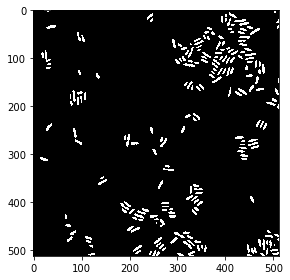

In [51]:
from skimage.io import imread, imshow, imread_collection, concatenate_images

imshow(tab_masks[225])
#imshow(tab_images[225])

#print(tab_images)

In [52]:
if show_table == True:
    for id in range(len(tab_masks)):
        print(id)
        cv2.imshow('imageOpen',tab_images[id])
        cv2.imshow('maskOpen',tab_masks[id])
        cv2.waitKey(0)


In [53]:
'''if calculated == True :
    tab_images=np.array(tab_images, dtype=np.float32)/255
    tab_masks =np.array(tab_masks,  dtype=np.float32)[:, :, :]/255
    
    train_images, test_images, train_masks, test_masks=train_test_split(tab_images, tab_masks, test_size=0.05)
    
    #del tab_images
    #del tab_masks'''

'if calculated == True :\n    tab_images=np.array(tab_images, dtype=np.float32)/255\n    tab_masks =np.array(tab_masks,  dtype=np.float32)[:, :, :]/255\n    \n    train_images, test_images, train_masks, test_masks=train_test_split(tab_images, tab_masks, test_size=0.05)\n    \n    #del tab_images\n    #del tab_masks'

In [54]:
if calculated == True :
    tab_images=np.ndarray((len(tab_images),len(tab_images[1]),len(tab_images[2]),3), dtype=np.uint8)/255
    tab_masks =np.ndarray((len(tab_masks),len(tab_masks[1]),len(tab_masks[2]),3), dtype=np.uint8)/255
    
    #train_images, test_images, train_masks, test_masks=train_test_split(tab_images, tab_masks, test_size=0.2)
    
    #del tab_images
    #del tab_masks
   

In [55]:
print((tab_images.shape))

(525, 512, 512, 3)


In [56]:
my_model = unet.model(64,512,512)

In [57]:

my_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


In [58]:
my_model.fit(tab_images,
             tab_masks,
             epochs=4,
             batch_size=3,
             validation_split=0.2,
             shuffle= True)


Train on 420 samples, validate on 105 samples
Epoch 1/4
420/420 [==============================] - 3269s 8s/sample - loss: 0.3747 - accuracy: 1.0000


KeyboardInterrupt: 

In [ ]:
#models.save_model(my_model,'.\models\cell-missmarple')

In [ ]:
dir_test_images='C:\\Users\\Administrateur\\Desktop\\showdown\\New_folder\\data\\test\\images\\'

In [ ]:
print(dir_test_images)

In [ ]:
test_image_path_list=[]

In [ ]:
for file in os.listdir(dir_test_images):
    extension= os.path.splitext(file)[1]
    if extension.lower() not in valid_image_extensions:
         continue
    test_image_path_list.append(os.path.join(dir_test_images, file))
print(test_image_path_list)   


In [ ]:
tab_test_images=[]
tab_files=[]
for fichier in os.listdir(dir_test_images):
    if fichier.split('.')[1] == 'tif':
        img=cv2.imread(dir_test_images+fichier)
        tab_test_images.append(img)
        tab_files.append(fichier.split('_')[0])

tab_test_images=np.array(tab_test_images, dtype=np.float32)/255
tab_files=np.array(tab_files)

for id in range(len(tab_test_images)):
    mask=np.zeros((512, 512, 1), dtype=np.float32)
    prediction=my_model.predict(np.array([tab_test_images[id]]))
    mask=prediction[0]*255
    cv2.imwrite("C:\\Users\\Administrateur\\Desktop\\showdown\\data\\test\\predictions\\"+str(tab_files[id])+".png", mask)

In [ ]:
#del tab_test_images
#del tab_files

In [ ]:
for file in os.listdir(dir_test_images):
    if file.split('.')[1] == 'png':
        img=cv2.imread(dir_test_images+file)
        tab_files.append(img)
        tab_files.append(file.split('_')[0])



In [ ]:
tab_files

In [ ]:
len(tab_test_images[2])

In [ ]:
tab_files

In [ ]:
#tab_test_images=np.ndarray((len(tab_files),len(tab_files[1]),len(tab_files[2]),3), dtype=np.uint8)/255
tab_files=np.ndarray((len(tab_files),len(tab_files[1]),len(tab_files[2]),3), dtype=np.uint8)/255
tab_masks =np.ndarray((len(tab_files),len(tab_files[1]),len(tab_files[2]),3), dtype=np.uint8)/255


In [ ]:
for id in range(len(tab_test_images)):
    mask=np.zeros((512, 512, 1), dtype=np.float32)
    #print(tab_test_images[id])
    prediction=my_model.predict(np.array([tab_test_images[id]]),verbose=1)
    mask=prediction[0]*255
    tab_masks.append(mask)
    #cv2.imshow('maskOpen',mask)
    cv2.imwrite("C:\\Users\\Administrateur\\Desktop\\DATA_Final\\processed\\DeLTA_data\\yeast\\evaluation\\seg_output\\"+str(tab_files[id])+".png", mask)

In [ ]:
print (tab_test_masks)

In [ ]:
cv2.imwrite("C:\\Users\\Administrateur\\Desktop\\showdown\\data\test\\predictions\\"+".png", tab_test_masks[0])